In [4]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# **8:2**

In [5]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Eth.csv')
df1=df.reset_index()['Close']
df1

0        136.443619
1        134.206955
2        132.249420
3        127.774124
4        137.822388
           ...     
1915    3840.256348
1916    3763.196533
1917    3746.849609
1918    3760.026611
1919    3813.198975
Name: Close, Length: 1920, dtype: float64

In [6]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [7]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [8]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [9]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [10]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [11]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 4s 69ms/step - loss: 0.0514 - val_loss: 0.0030
Epoch 2/100
23/23 [==============================] - 1s 46ms/step - loss: 0.0056 - val_loss: 7.2959e-04
Epoch 3/100
23/23 [==============================] - 2s 78ms/step - loss: 9.3252e-04 - val_loss: 7.3840e-04
Epoch 4/100
23/23 [==============================] - 2s 64ms/step - loss: 7.3100e-04 - val_loss: 6.4357e-04
Epoch 5/100
23/23 [==============================] - 1s 47ms/step - loss: 6.8593e-04 - val_loss: 6.3652e-04
Epoch 6/100
23/23 [==============================] - 1s 47ms/step - loss: 6.5849e-04 - val_loss: 5.9825e-04
Epoch 7/100
23/23 [==============================] - 1s 47ms/step - loss: 6.3460e-04 - val_loss: 6.2666e-04
Epoch 8/100
23/23 [==============================] - 1s 49ms/step - loss: 6.1906e-04 - val_loss: 5.4864e-04
Epoch 9/100
23/23 [==============================] - 1s 46ms/step - loss: 6.0395e-04 - val_loss: 5.5035e-04
Epoch 10/100
23/23 [====================

In [13]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred_test=model.predict(X_test)

9/9 [==============================] - 0s 11ms/step


In [14]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred_test=scaler.inverse_transform(y_pred_test)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [15]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
print('Testing RMSE:', test_rmse)

test_mae = np.mean(abs(y_pred_test - y_test))
print('Testing MAE:', test_mae)

test_mape = np.mean(np.abs(y_pred_test - y_test)/np.abs(y_pred_test))
print('Testing MAPE:', test_mape)

Testing RMSE: 102.05642010420253
Testing MAE: 76.36963365103273
Testing MAPE: 0.02963401049832185


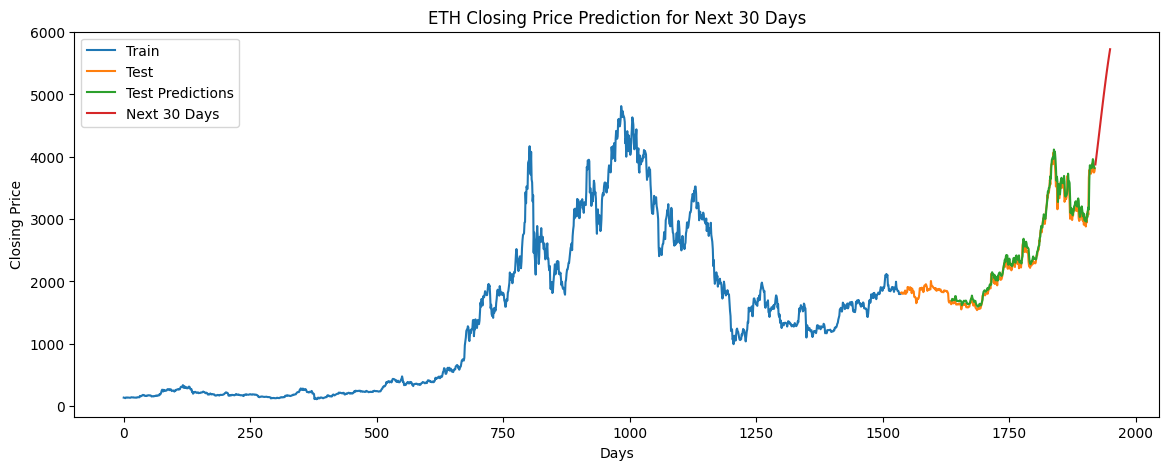

Predicted closing prices for the next 30 days:
[3876.1992 3940.2505 4006.1804 4072.9656 4140.356  4208.2114 4276.4165
 4344.8555 4413.424  4482.015  4550.531  4618.8726 4686.9463 4754.6606
 4821.9277 4888.659  4954.77   5020.1777 5084.805  5148.5723 5211.41
 5273.247  5334.0127 5393.643  5452.0815 5509.2686 5565.15   5619.681
 5672.8164 5724.518 ]


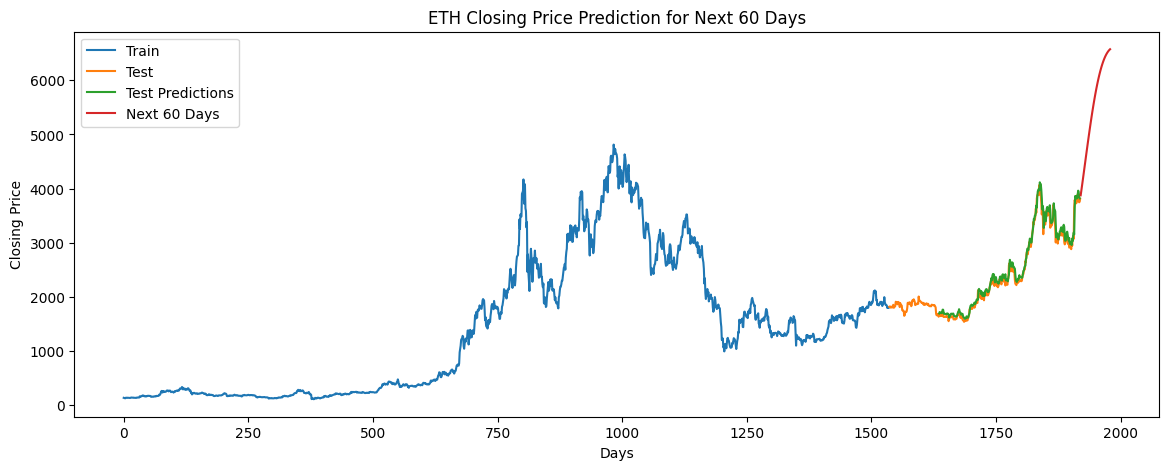

Predicted closing prices for the next 60 days:
[3876.1992 3940.2505 4006.1804 4072.9656 4140.356  4208.2114 4276.4165
 4344.8555 4413.424  4482.015  4550.531  4618.8726 4686.9463 4754.6606
 4821.9277 4888.659  4954.77   5020.1777 5084.805  5148.5723 5211.41
 5273.247  5334.0127 5393.643  5452.0815 5509.2686 5565.15   5619.681
 5672.8164 5724.518  5774.746  5823.47   5870.6694 5916.3193 5960.4004
 6002.9023 6043.8125 6083.1274 6120.8477 6156.9746 6191.511  6224.4683
 6255.856  6285.691  6313.9883 6340.771  6366.069  6389.903  6412.3047
 6433.3047 6452.93   6471.209  6488.178  6503.869  6518.3203 6531.5625
 6543.634  6554.571  6564.4116 6573.193 ]


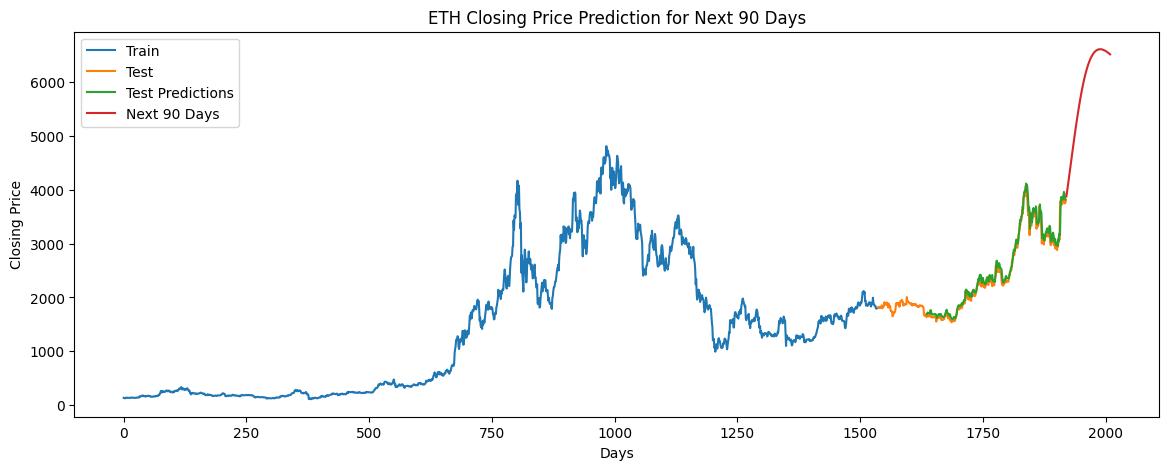

Predicted closing prices for the next 90 days:
[3876.1992 3940.2505 4006.1804 4072.9656 4140.356  4208.2114 4276.4165
 4344.8555 4413.424  4482.015  4550.531  4618.8726 4686.9463 4754.6606
 4821.9277 4888.659  4954.77   5020.1777 5084.805  5148.5723 5211.41
 5273.247  5334.0127 5393.643  5452.0815 5509.2686 5565.15   5619.681
 5672.8164 5724.518  5774.746  5823.47   5870.6694 5916.3193 5960.4004
 6002.9023 6043.8125 6083.1274 6120.8477 6156.9746 6191.511  6224.4683
 6255.856  6285.691  6313.9883 6340.771  6366.069  6389.903  6412.3047
 6433.3047 6452.93   6471.209  6488.178  6503.869  6518.3203 6531.5625
 6543.634  6554.571  6564.4116 6573.193  6580.9556 6587.74   6593.5786
 6598.507  6602.557  6605.777  6608.2056 6609.8804 6610.8223 6611.064
 6610.635  6609.575  6607.921  6605.7085 6602.965  6599.714  6595.9863
 6591.8203 6587.2275 6582.2373 6576.873  6571.1665 6565.1187 6558.7803
 6552.142  6545.248  6538.0864 6530.6094 6522.958  6515.172 ]


In [16]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(14, 5))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'ETH Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **7:3**

In [17]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Eth.csv')
df1=df.reset_index()['Close']

In [18]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [20]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 4s 74ms/step - loss: 0.0560 - val_loss: 0.0076
Epoch 2/100
20/20 [==============================] - 1s 51ms/step - loss: 0.0076 - val_loss: 9.9827e-04
Epoch 3/100
20/20 [==============================] - 1s 72ms/step - loss: 0.0012 - val_loss: 9.9304e-04
Epoch 4/100
20/20 [==============================] - 2s 81ms/step - loss: 9.5559e-04 - val_loss: 5.5233e-04
Epoch 5/100
20/20 [==============================] - 1s 63ms/step - loss: 8.3170e-04 - val_loss: 5.1697e-04
Epoch 6/100
20/20 [==============================] - 1s 50ms/step - loss: 8.0711e-04 - val_loss: 5.6403e-04
Epoch 7/100
20/20 [==============================] - 1s 51ms/step - loss: 7.7117e-04 - val_loss: 4.4379e-04
Epoch 8/100
20/20 [==============================] - 1s 51ms/step - loss: 7.3258e-04 - val_loss: 5.7074e-04
Epoch 9/100
20/20 [==============================] - 1s 50ms/step - loss: 7.2703e-04 - val_loss: 4.2531e-04
Epoch 10/100
20/20 [========================

In [25]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 11ms/step


In [26]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [27]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)
test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)
test_mape = np.mean(np.abs(y_pred - ytest)/np.abs(y_pred))
print('Testing MAPE:', test_mape)

Testing RMSE: 2283.887661279243
Testing MAE: 2189.2706525038816
Testing MAPE: 0.9997792079998837


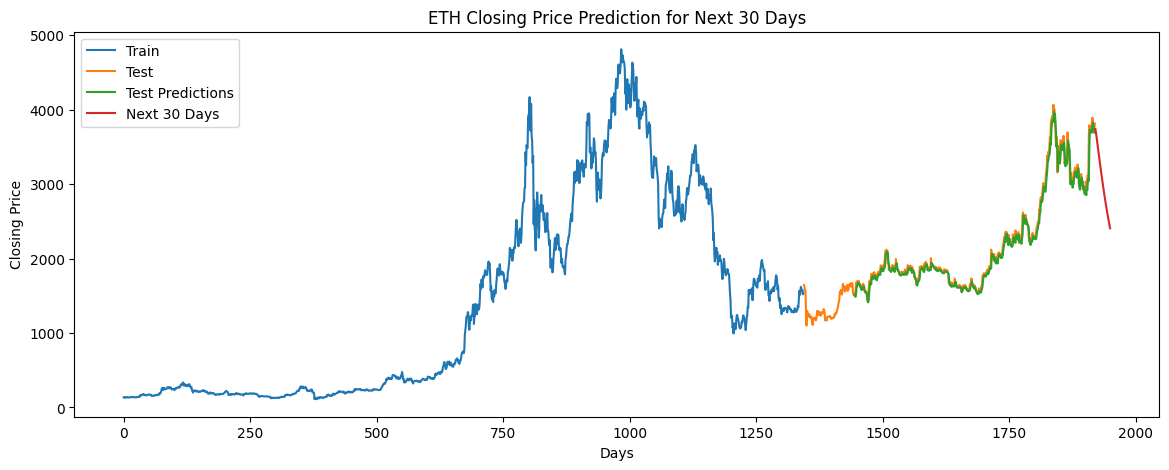

Predicted closing prices for the next 30 days:
[3740.9026 3697.4094 3646.6606 3594.5278 3541.823  3488.9507 3436.1372
 3383.548  3331.3088 3279.5254 3228.283  3177.6572 3127.7053 3078.486
 3030.042  2982.4077 2935.6133 2889.6782 2844.6228 2800.456  2757.1865
 2714.815  2673.338  2632.7468 2593.0374 2554.1958 2516.2026 2479.048
 2442.7131 2407.1775]


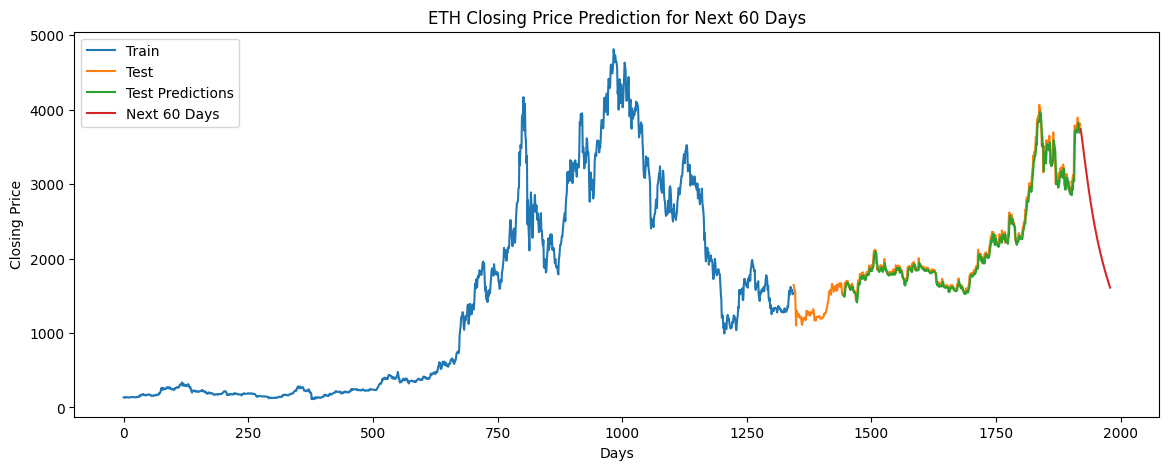

Predicted closing prices for the next 60 days:
[3740.9026 3697.4094 3646.6606 3594.5278 3541.823  3488.9507 3436.1372
 3383.548  3331.3088 3279.5254 3228.283  3177.6572 3127.7053 3078.486
 3030.042  2982.4077 2935.6133 2889.6782 2844.6228 2800.456  2757.1865
 2714.815  2673.338  2632.7468 2593.0374 2554.1958 2516.2026 2479.048
 2442.7131 2407.1775 2372.42   2338.4204 2305.1587 2272.6118 2240.7568
 2209.572  2179.0344 2149.121  2119.8127 2091.0852 2062.916  2035.2853
 2008.1715 1981.5547 1955.4155 1929.7352 1904.4967 1879.6819 1855.274
 1831.2572 1807.6149 1784.3315 1761.3931 1738.786  1716.4962 1694.5115
 1672.8192 1651.4081 1630.2672 1609.3855]


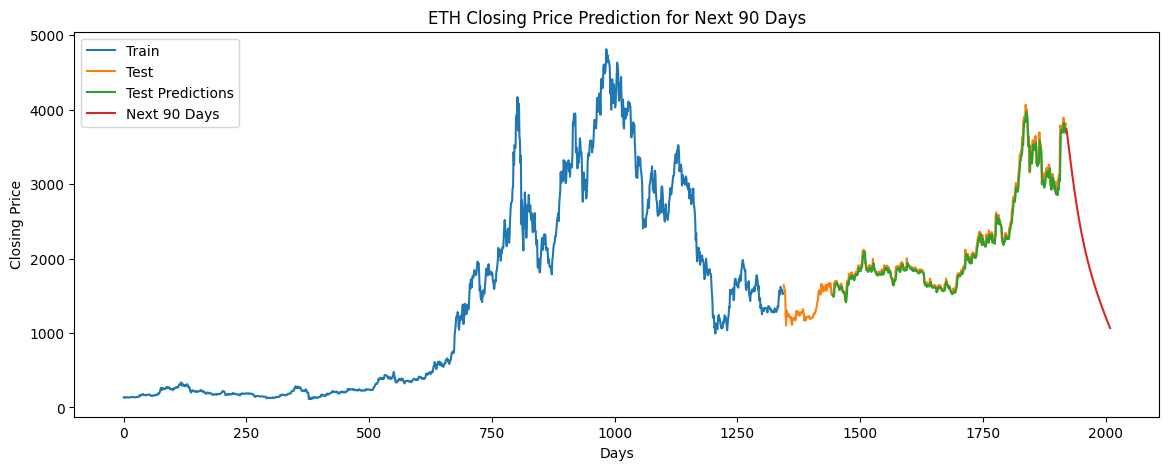

Predicted closing prices for the next 90 days:
[3740.9026 3697.4094 3646.6606 3594.5278 3541.823  3488.9507 3436.1372
 3383.548  3331.3088 3279.5254 3228.283  3177.6572 3127.7053 3078.486
 3030.042  2982.4077 2935.6133 2889.6782 2844.6228 2800.456  2757.1865
 2714.815  2673.338  2632.7468 2593.0374 2554.1958 2516.2026 2479.048
 2442.7131 2407.1775 2372.42   2338.4204 2305.1587 2272.6118 2240.7568
 2209.572  2179.0344 2149.121  2119.8127 2091.0852 2062.916  2035.2853
 2008.1715 1981.5547 1955.4155 1929.7352 1904.4967 1879.6819 1855.274
 1831.2572 1807.6149 1784.3315 1761.3931 1738.786  1716.4962 1694.5115
 1672.8192 1651.4081 1630.2672 1609.3855 1588.7537 1568.3611 1548.1987
 1528.2582 1508.531  1489.0085 1469.6837 1450.5493 1431.5978 1412.8225
 1394.2174 1375.7761 1357.493  1339.3625 1321.3793 1303.538  1285.834
 1268.2626 1250.8192 1233.4994 1216.2998 1199.2157 1182.2433 1165.3795
 1148.6204 1131.9628 1115.4032 1098.9387 1082.5665 1066.2833]


In [28]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(14, 5))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred)), y_pred, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'ETH Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **6:4**

In [29]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Eth.csv')
df1=df.reset_index()['Close']

In [30]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [31]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [32]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [33]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [34]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [35]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 3s 82ms/step - loss: 0.0666 - val_loss: 0.0113
Epoch 2/100
17/17 [==============================] - 1s 53ms/step - loss: 0.0113 - val_loss: 0.0028
Epoch 3/100
17/17 [==============================] - 1s 71ms/step - loss: 0.0017 - val_loss: 7.2731e-04
Epoch 4/100
17/17 [==============================] - 1s 86ms/step - loss: 0.0012 - val_loss: 4.4846e-04
Epoch 5/100
17/17 [==============================] - 1s 79ms/step - loss: 9.1720e-04 - val_loss: 5.1861e-04
Epoch 6/100
17/17 [==============================] - 1s 53ms/step - loss: 8.3006e-04 - val_loss: 4.1236e-04
Epoch 7/100
17/17 [==============================] - 1s 56ms/step - loss: 8.0016e-04 - val_loss: 4.0405e-04
Epoch 8/100
17/17 [==============================] - 1s 53ms/step - loss: 7.6345e-04 - val_loss: 4.1888e-04
Epoch 9/100
17/17 [==============================] - 1s 54ms/step - loss: 7.5667e-04 - val_loss: 4.1232e-04
Epoch 10/100
17/17 [==============================] 

In [37]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

21/21 [==============================] - 0s 11ms/step


In [38]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [39]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

test_mape = np.mean(np.abs(y_pred - ytest)/np.abs(y_pred))
print('Testing MAPE:', test_mape)

Testing RMSE: 2122.929024387629
Testing MAE: 2015.8356604147982
Testing MAPE: 0.9997825226442723


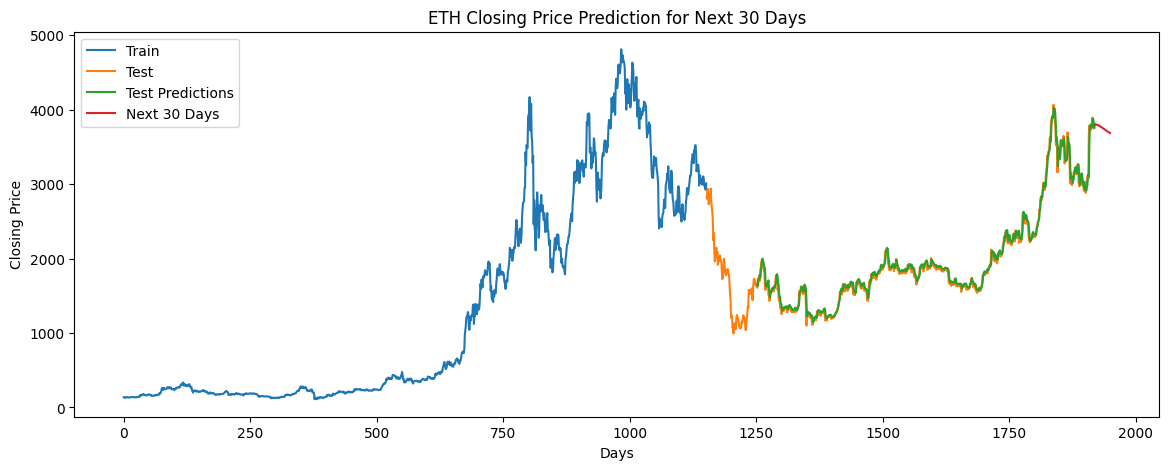

Predicted closing prices for the next 30 days:
[3797.705  3799.2527 3798.6973 3797.1758 3795.0256 3792.3467 3789.225
 3785.733  3781.9258 3777.8567 3773.57   3769.1045 3764.4973 3759.78
 3754.9814 3750.1282 3745.244  3740.3484 3735.4631 3730.6033 3725.783
 3721.017  3716.3164 3711.6914 3707.1501 3702.7    3698.348  3694.099
 3689.9575 3685.9265]


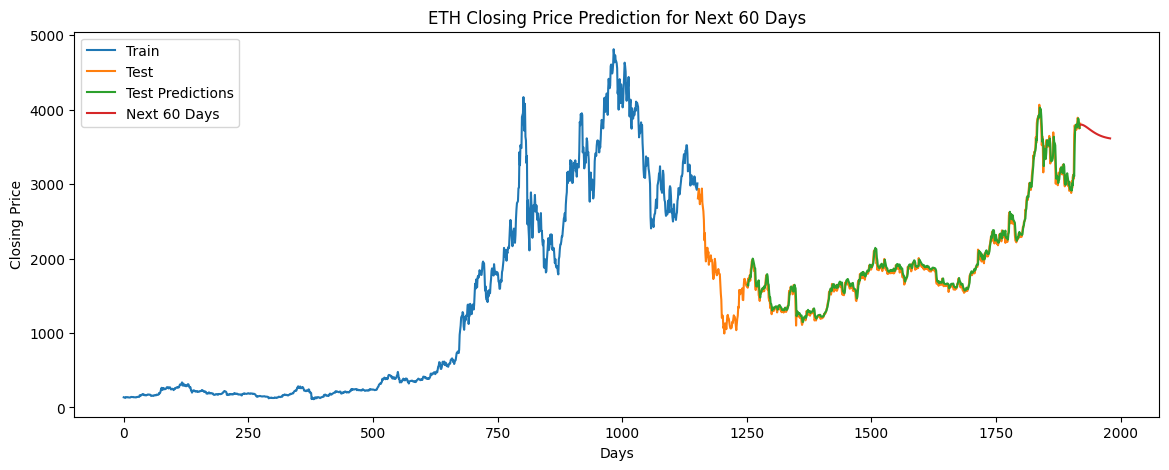

Predicted closing prices for the next 60 days:
[3797.705  3799.2527 3798.6973 3797.1758 3795.0256 3792.3467 3789.225
 3785.733  3781.9258 3777.8567 3773.57   3769.1045 3764.4973 3759.78
 3754.9814 3750.1282 3745.244  3740.3484 3735.4631 3730.6033 3725.783
 3721.017  3716.3164 3711.6914 3707.1501 3702.7    3698.348  3694.099
 3689.9575 3685.9265 3682.009  3678.2078 3674.5234 3670.9563 3667.508
 3664.1755 3660.9614 3657.8633 3654.8782 3652.007  3649.2458 3646.5935
 3644.0479 3641.6057 3639.2654 3637.023  3634.8762 3632.823  3630.8591
 3628.9824 3627.1892 3625.477  3623.843  3622.2844 3620.7993 3619.382
 3618.033  3616.7476 3615.5234 3614.3582]


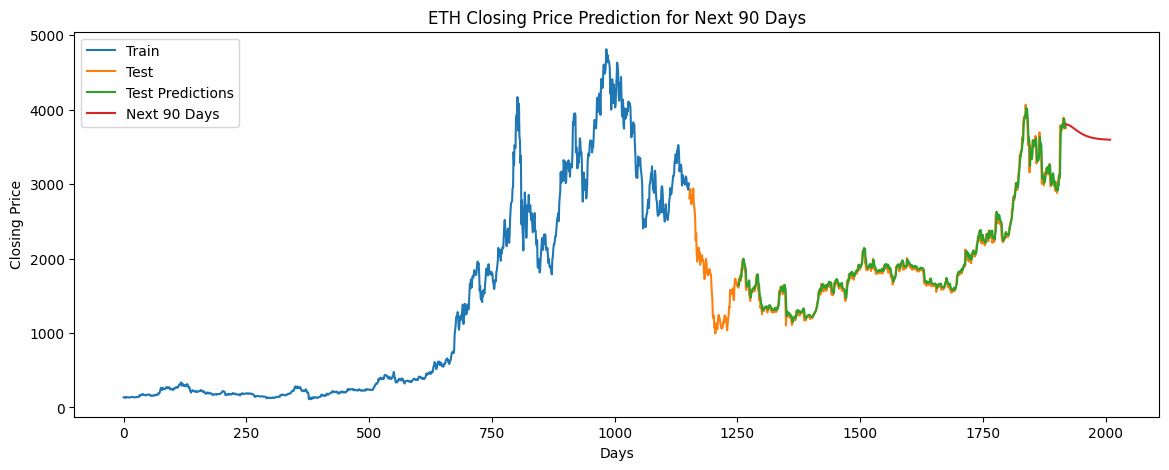

Predicted closing prices for the next 90 days:
[3797.705  3799.2527 3798.6973 3797.1758 3795.0256 3792.3467 3789.225
 3785.733  3781.9258 3777.8567 3773.57   3769.1045 3764.4973 3759.78
 3754.9814 3750.1282 3745.244  3740.3484 3735.4631 3730.6033 3725.783
 3721.017  3716.3164 3711.6914 3707.1501 3702.7    3698.348  3694.099
 3689.9575 3685.9265 3682.009  3678.2078 3674.5234 3670.9563 3667.508
 3664.1755 3660.9614 3657.8633 3654.8782 3652.007  3649.2458 3646.5935
 3644.0479 3641.6057 3639.2654 3637.023  3634.8762 3632.823  3630.8591
 3628.9824 3627.1892 3625.477  3623.843  3622.2844 3620.7993 3619.382
 3618.033  3616.7476 3615.5234 3614.3582 3613.2498 3612.1953 3611.1912
 3610.237  3609.3293 3608.4675 3607.6472 3606.8677 3606.126  3605.4219
 3604.7522 3604.116  3603.5105 3602.9358 3602.389  3601.8682 3601.3738
 3600.9026 3600.4536 3600.0266 3599.6196 3599.2312 3598.861  3598.5093
 3598.1729 3597.8523 3597.546  3597.254  3596.9758 3596.7112]


In [40]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(14, 5))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred)), y_pred, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'ETH Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())